# Importing the essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Data Gathering

In [2]:
# The original dataframe is available on my drive at https://drive.google.com/file/d/1QOuRVokiUC6Q2JiB4TaMZDNnBKcq3qs8/view?usp=sharing
odf=pd.read_csv('/content/drive/MyDrive/IBM/DataAnalysis/kc_house_data.csv')

df=odf
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Data wrangling

1- Checking for missing values

In [3]:
df.isnull().sum()
#nice

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

 2- Check for outliers and noise data

In [4]:
pd.DataFrame(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Price column it seems to be normal because of the values of min and max are accepted 

In [6]:
# For number of bedrooms
print(df['bedrooms'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


In [7]:
df['bedrooms'].iloc[df[df['bedrooms']==33].index[0]]=10
df['bedrooms'].iloc[df[df['bedrooms']==11].index[0]]=10

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
# For number of bathrooms
print(df['bathrooms'].value_counts())
print("++++++++++++++++++++++")
lst=list(df['bathrooms'])
for i,v in enumerate(lst):
  lst[i]=int(v)
  if lst[i] == 0:
    lst[i]=1
  if ((v==7) or (v==8)):
    lst[i]=6

df['bathrooms']=lst
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
++++++++++++++++++++++


2    10542
1     8441
3     2228
4      338
5       48
6       14
7        2
Name: bathrooms, dtype: int64

In [9]:
# For sqft_living and	sqft_lot I will do nothing because I will do 
# the analysis useing the updated two columns sqft_living15 and sqft_lot15

In [10]:
# For number of floors

lst=df['floors']
for i,v in enumerate(lst):
  lst[i]=int(v)

df['floors']=lst
df['floors'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1.0    12590
2.0     8402
3.0      621
Name: floors, dtype: int64

In [11]:
# For waterfront, view, condition, grade, sqft_above,	sqft_basement,	yr_built, 
# lat, and long, after test print them value_counts they seem to be normal !

In [12]:
# For yr_renovated column

print(df['yr_renovated'].min())
# I intend to show this, there is a 0 as minimum which is un logic 
#  but do not worry about it, in the next section which is feature extraction I will 
#  embedded yr_renovated and yr_built columns in one and handle it there.


0


In [13]:
# For latitude angle column 
print('The minimum angle is: {}'.format(df['lat'].min()))
print('The maximum angle is: {}'.format(df['lat'].max()))
#Those two values are almost the same to the actual value which is 47.5480° N

The minimum angle is: 47.1559
The maximum angle is: 47.7776


In [14]:
# For longitude angle column 
print('The minimum angle is: {}'.format(df['long'].min()))
print('The maximum angle is: {}'.format(df['long'].max()))
#Those two values are almost the same to the actual value which is 121.9836° W

The minimum angle is: -122.51899999999999
The maximum angle is: -121.315


In [15]:
# For sqft_living15 column the only thing I done is to remove the outliers

IQR=(2360.000000-1840.000000)
uo=2360.000000+(1.5*IQR) #Upper outlier
lo=1490.000000-(1.5*IQR) #Lower outlier

for i,v in enumerate(df['sqft_living15']):
  if v > uo :
    df['sqft_living15'].iloc[i] = uo
  if v < lo :
    df['sqft_living15'].iloc[i] = lo




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
# For sqft_lot15 column the only thing I done is to remove the outliers

IQR=(10083.000000-5100.000000)
uo=10083.000000+(1.5*IQR) #Upper outlier
lo=7620.000000 -(1.5*IQR) #Lower outlier

for i,v in enumerate(df['sqft_lot15']):
  if v > uo :
    df['sqft_lot15'].iloc[i] = uo
  if v < lo :
    df['sqft_lot15'].iloc[i] = lo


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
pd.DataFrame(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.369731,1.753528,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1952.679452,8298.152917
std,2.876566e+09,3.671272e+05,0.908717,0.726729,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,598.572224,4363.479209
min,1.000102e+06,7.500000e+04,0.000000,1.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,710.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,10.000000,7.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3140.000000,17557.500000


3- Remove the duplicated rows

In [18]:
#The entire data must not contain any duplicated
print('The number of repeated rows for entire dataframe is {}'.format(df.duplicated().sum()))

The number of repeated rows for entire dataframe is 0


In [19]:
# The only on column must not has any duplicated rows is the id, because it's a unique feature
print('The number of repeated rows for the ID column is {}'.format(df.duplicated(subset=['id']).sum()))
# Note: I will not drop this repeated rows because it maybe refares to the same unit sold many times between May2014 and May2015 

The number of repeated rows for the ID column is 177


In [20]:
# To ensure that I will drop the entire id column then search for any duplicate rows
test=df.drop(['id'],axis=1)

In [21]:
test.duplicated().sum()
#nice

0

3- Features Extraction

In [22]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
# First I will extract the ages columns

age=[]

renewal_age=[]

drops=[]


for i,v in enumerate(df['yr_built']):
  r= df['yr_renovated'].iloc[i]

  age.append(2021-int(v))

  if (r <= v):
    renewal_age.append(0)
  else:
    renewal_age.append(2021-int(r))


In [24]:
# Then I will make the two datasets represents the inout and outout named x and y 

# For x: as mentioned earlier I will use the columns represent the specific features of units
#        I will use  ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_living15', 'sqft_lot15']
#        till now, and in the next cell I will add the ages columns
x=pd.DataFrame(data = df , columns = ['bedrooms', 'bathrooms', 'floors', 
                                      'waterfront', 'view', 'condition', 'grade',
                                      'sqft_living15', 'sqft_lot15'])

floors=[int(x) for x in x['floors']]
x['floors']=floors

# For y: only the proce will be the output
y=pd.DataFrame(data=df , columns=['price'])


In [25]:
# Renamming the sqft_living15', 'sqft_lot15' columns and adding the ages columns

x.rename(columns={'sqft_living15':'sqft_living' , 'sqft_lot15':'sqft_lot'},inplace=True)
x['age']=age
x['renewal-age']=renewal_age
x.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_living', 'sqft_lot', 'age', 'renewal-age'],
      dtype='object')

In [26]:
x.describe()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_living,sqft_lot,age,renewal-age
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.369731,1.753528,1.446213,0.007542,0.234303,3.409430,7.656873,1952.679452,8298.152917,49.994864,1.064544
std,0.908717,0.726729,0.551894,0.086517,0.766318,0.650743,1.175459,598.572224,4363.479209,29.373411,5.986431
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,710.000000,651.000000,6.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,5100.000000,24.000000,0.000000
50%,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1840.000000,7620.000000,46.000000,0.000000
75%,4.000000,2.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2360.000000,10083.000000,70.000000,0.000000
max,10.000000,7.000000,3.000000,1.000000,4.000000,5.000000,13.000000,3140.000000,17557.500000,121.000000,87.000000


In [27]:
drops=[]

for i,v in enumerate (x.duplicated()):
  if v == True:
    drops.append(i)

x.drop(drops,axis=0,inplace=True)

In [28]:
x.duplicated().sum()

0

In [29]:
y.drop(drops,axis=0,inplace=True)



In [30]:
print(len(y)==len(x))
# Ready to school !

True


#EDA

First for columns contain discrete values 

In [31]:
x.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_living', 'sqft_lot', 'age', 'renewal-age'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


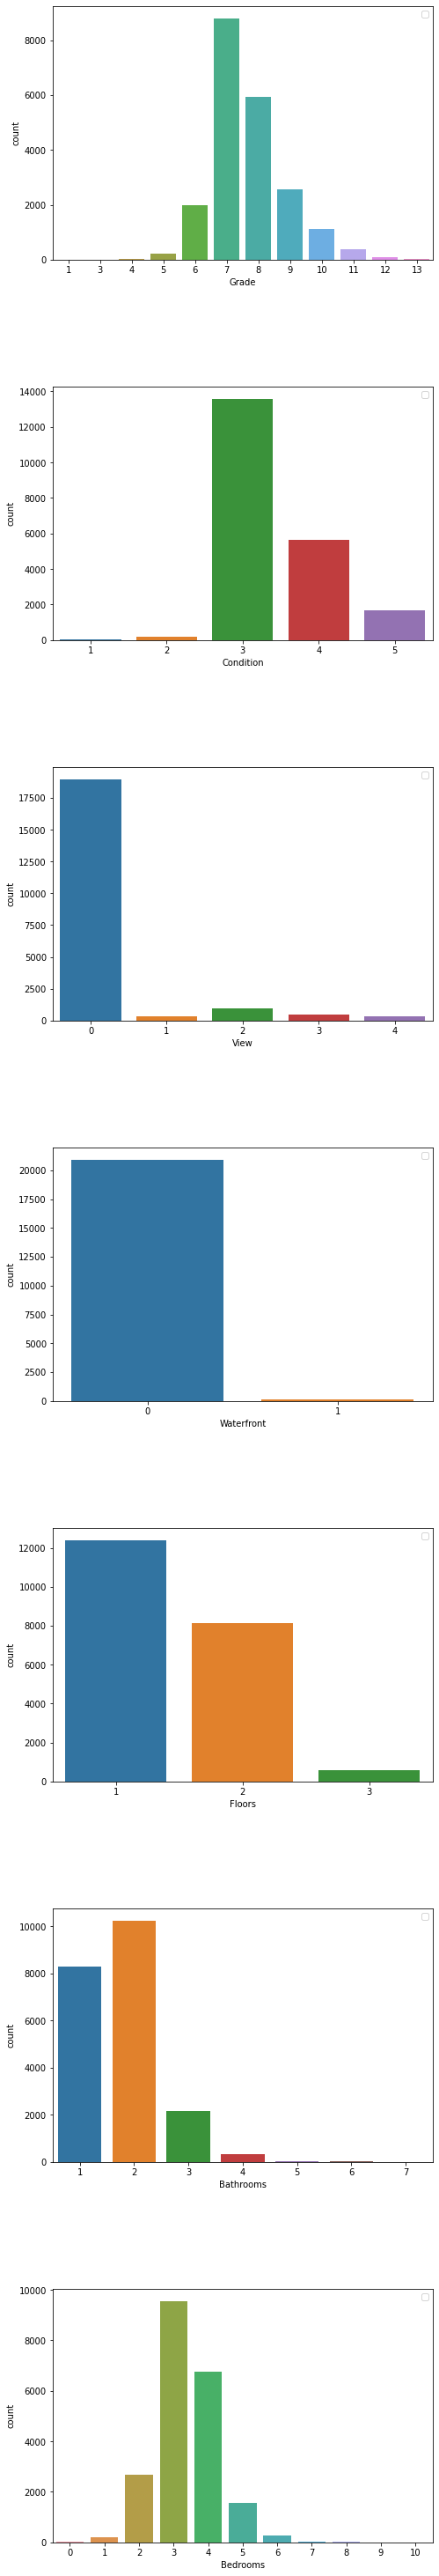

In [32]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
o=0
for i in ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition','grade']:
  ax=fig.add_axes([0,o,1,1])
  sb.countplot(data=x,x=i,ax=ax);
  plt.xlabel('{}'.format(str(i)).title());
  plt.legend();
  o+=1.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


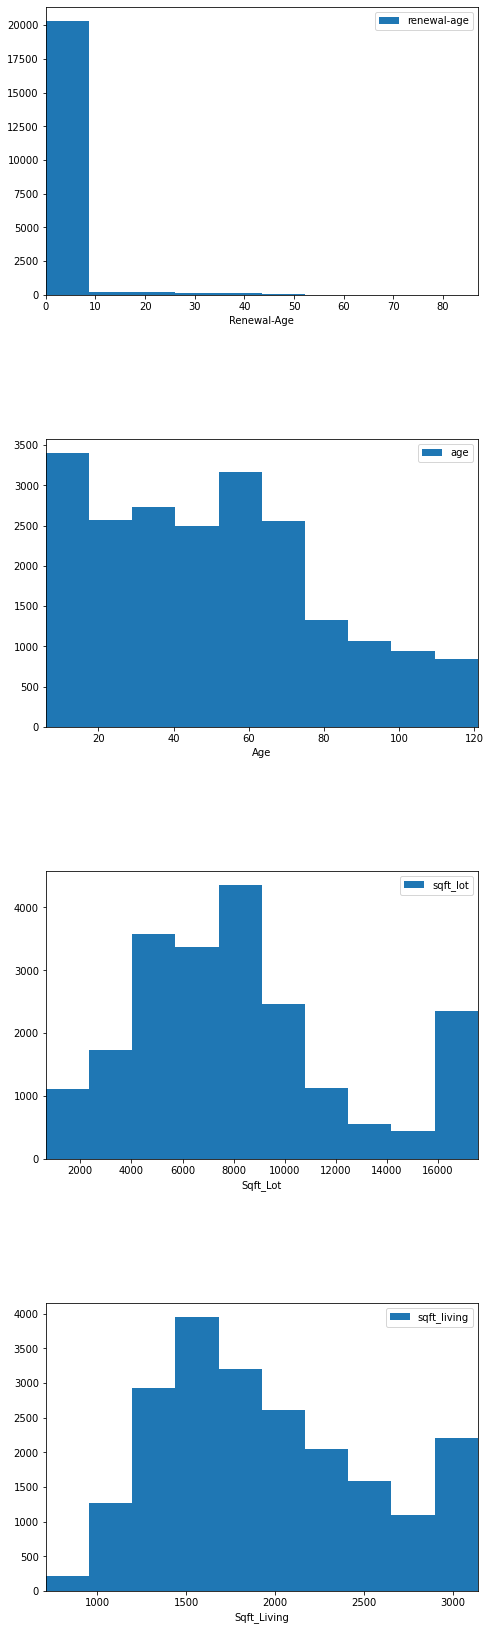

In [33]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
o=0
for i in ['sqft_living', 'sqft_lot', 'age', 'renewal-age']:
  ax=fig.add_axes([0,o,1,1])
  ax.hist(data=x,x=i)
  plt.xlim((x[i].min(),x[i].max()))
  plt.xlabel('{}'.format(str(i)).title());
  plt.legend();
  o+=1.5

# Machine learning part  (For predicting the prices)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

model=LR().fit(x_train,y_train)

y_pred_train=model.predict(x_train)
print('The Training R2 Score: {}'.format(r2_score(y_train,y_pred_train)))

y_pred_test=model.predict(x_test)
print('The Testing R2 Score: {}'.format(r2_score(y_test,y_pred_test)))

'''We can note that, the accuracy not enough high but there is not 
underfitting because the train and test metrices are almost the same. 
Just for trying I will do MinMaxScaler normalization to check if 
the high varaity of feature ranges causing this or not'''

The Training R2 Score: 0.6090356568534518
The Testing R2 Score: 0.6330942262786194


'We can note that, the accuracy not enough high but there is not \nunderfitting because the train and test metrices are almost the same. \nJust for trying I will do MinMaxScaler normalization to check if \nthe high varaity of feature ranges causing this or not'

In [36]:
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x,y)


scaler = MinMaxScaler().fit(x_train)
normalized_X = scaler.transform(x_train)
normalized_X_test = scaler.transform(x_test)


model_test=LR().fit(normalized_X,y_train)


y_pred_train=model_test.predict(normalized_X)
print('The Training R2 Score: {}'.format(r2_score(y_train,y_pred_train)))

y_pred_test=model_test.predict(normalized_X_test)
print('The Testing R2 Score: {}'.format(r2_score(y_test,y_pred_test)))

'''These accuracies measurements are almost the same to the model run 
without feature normalization so, it's recommended to use the first model'''

The Training R2 Score: 0.6159225416586571
The Testing R2 Score: 0.6113302613572285


'These accuracies measurements are almost the same to the model run \nwithout feature normalization so, its recommended to use the first model'